In [2]:
"""                                                  
##     ##   ##         ---------- Practical No : 1 --------------
###   ###   ##         --- Name: Mayur Jivan Hebade -------------
#### ####   ##         --- Roll No: 44 --------------------------
## ### ##   ##         --- Subject: Machine Learning ------------
##  #  ##   ########   --- BE_COMP ------------------------------
##     ##   ########
"""
import warnings ; warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df.drop(labels='Unnamed: 0', axis = 1, inplace= True)
df.drop(labels='key', axis = 1, inplace= True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


<Axes: xlabel='fare_amount', ylabel='Density'>

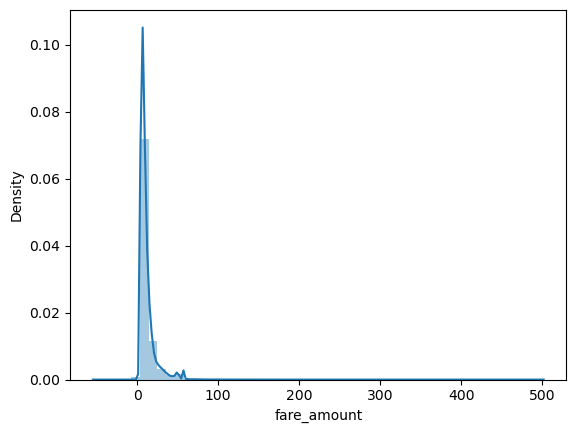

In [11]:
sns.distplot(df["fare_amount"])

<Axes: xlabel='pickup_latitude', ylabel='Density'>

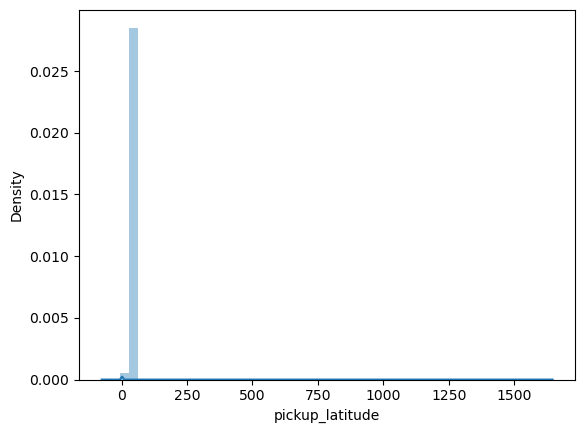

In [12]:
sns.distplot(df["pickup_latitude"])

<Axes: xlabel='pickup_longitude', ylabel='Density'>

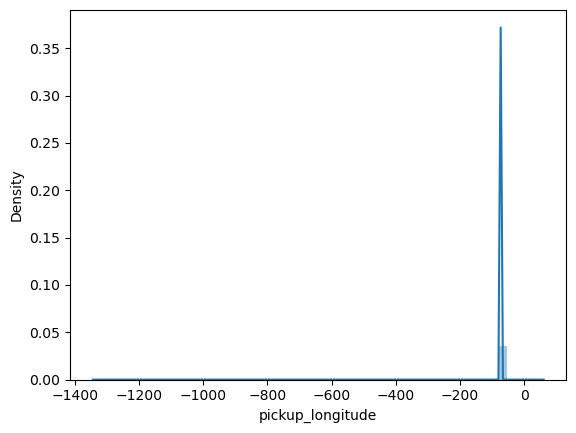

In [13]:
sns.distplot(df["pickup_longitude"])

<Axes: xlabel='dropoff_longitude', ylabel='Density'>

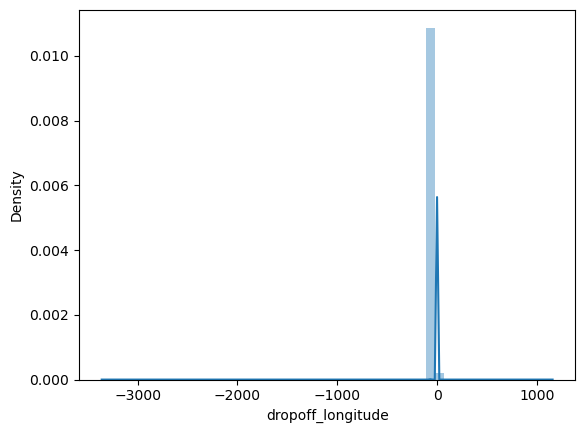

In [14]:
sns.distplot(df["dropoff_longitude"])

<Axes: xlabel='dropoff_latitude', ylabel='Density'>

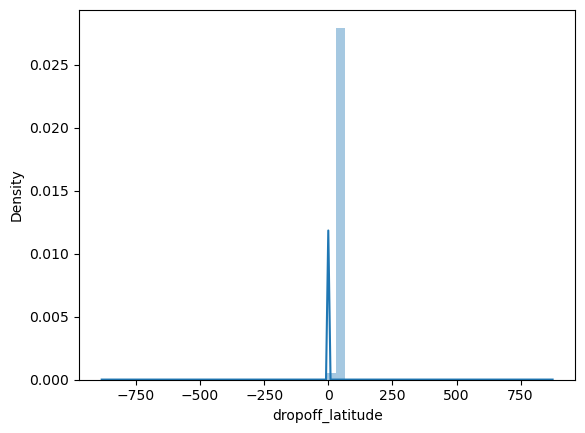

In [15]:
sns.distplot(df["dropoff_latitude"])

In [16]:
def outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers =df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = outliers_IQR(df["fare_amount"])
print("**Number of Outliers: " +str(len(outliers)))
print("**Max oultier Values: "+str(outliers.max()))
print("**Min outlier Value: "+str(outliers.min()))
outliers

**Number of Outliers: 17166
**Max oultier Values: 499.0
**Min outlier Value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [17]:
outliers = outliers_IQR(df[["passenger_count", "fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


In [18]:
upper_limit = df['fare_amount'].mean() + 3*df['fare_amount'].std()
print(upper_limit)
lower_limit = df['fare_amount'].mean() - 3*df['fare_amount'].std()
print(lower_limit)

41.06517154774142
-18.345388448825922


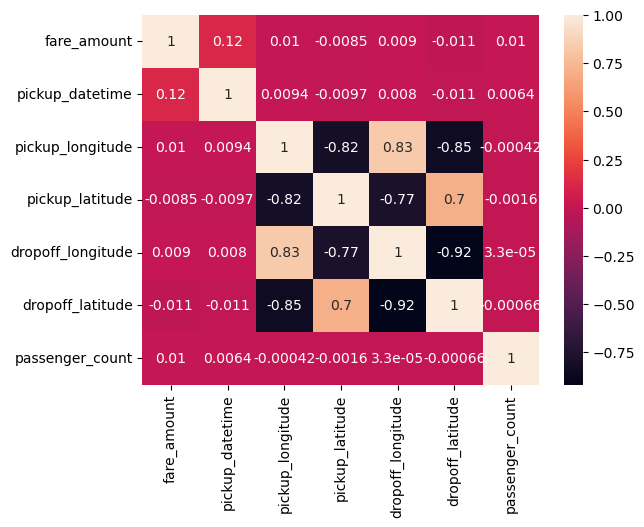

In [19]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot =True)
plt.show()

In [20]:
import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df.drop(['pickup_datetime'], axis =1, inplace=True)
df.weekday = df.weekday.map({ 
    'Sunday':0, 'Monday':1,  'Tuesday':2, 
    'Wednesday':3, 'Thursday':4, 
    'Friday':5, 'Saturday':6})
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   day                199999 non-null  int64  
 7   hour               199999 non-null  int64  
 8   month              199999 non-null  int64  
 9   year               199999 non-null  int64  
 10  weekday            199999 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


In [22]:
from sklearn.model_selection import train_test_split
x=df.drop('fare_amount', axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4
...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0
199996,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,5
199997,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1
199998,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3


In [23]:
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
104406,-73.954347,40.763839,-73.950884,40.771308,1,22,19,9,2013,0
155552,-73.977028,40.743278,-73.986602,40.728143,1,25,17,3,2011,5
75475,-73.983017,40.781655,-73.976823,40.788423,3,7,17,1,2009,3
142151,-73.982161,40.757050,-73.959005,40.783415,1,12,15,6,2009,5
109426,-73.958803,40.815331,-73.961285,40.811988,1,22,8,3,2011,2


In [24]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
54458,-73.961287,40.771617,-73.974797,40.761457,1,12,19,11,2009,4
193387,-73.937060,40.854562,-73.984868,40.773842,2,17,13,2,2013,0
57401,-73.978800,40.762280,-73.973973,40.762740,1,24,14,12,2011,6
115324,-73.958191,40.760422,-73.861557,40.865349,1,9,12,2,2015,1
71684,-73.951845,40.778344,-73.958517,40.783291,1,3,15,11,2009,2


In [25]:
y_train.head()

104406    5.0
155552    5.3
75475     4.1
142151    8.9
109426    3.3
Name: fare_amount, dtype: float64

In [26]:
y_test.head()

54458      7.7
193387    24.0
57401      4.1
115324    34.0
71684      4.5
Name: fare_amount, dtype: float64